#  Experiments on the general problem
Javier Sales, Spring 2023

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.lines as plt_lines
from time_contracts import *
from itertools import product
import pandas as pd
#from tqdm.notebook import tqdm
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LightSource
from matplotlib import cm
import matplotlib.colors as plt_colors

## Test simpliciations
First test if the simplifications on the optimization problem are valid (i.e. they give the same solution)

In [7]:
np.set_printoptions(precision=3)
psi = 0.49
alpha_d = 11

In [8]:
G_t, W_t, L_t = general_contracts(monotonicity=True)
G_f, W_f, L_f = general_contracts(monotonicity=False)

print("Monotonicity constraints")
print(np.mean(np.abs(G_t-G_f)))
print(np.mean(np.abs(W_t-W_f)))
print(np.mean(np.abs(L_t-L_f)))

Monotonicity constraints
1.1196660789611653e-05
0.0007130027171777797
0.00011921467751204358


In [9]:
G_all, W_all, L_all = general_contracts(IC = "all"        , monotonicity=False)
G_neq, W_neq, L_neq = general_contracts(IC = "neq"        , monotonicity=False)
G_ort, W_ort, L_ort = general_contracts(IC = "ort"        , monotonicity=False)
G_ort_d, W_ort_d, L_ort_d = general_contracts(IC = "ort_d", monotonicity=False)
G_ort_l, W_ort_l, L_ort_l = general_contracts(IC = "ort_l", monotonicity=False)

G_fall,   W_fall,   L_fall   = general_contracts(IR = "fst", IC = "all"  , monotonicity=False)
G_fneq,   W_fneq,   L_fneq   = general_contracts(IR = "fst", IC = "neq"  , monotonicity=False)
G_fort,   W_fort,   L_fort   = general_contracts(IR = "fst", IC = "ort"  , monotonicity=False)
G_fort_d, W_fort_d, L_fort_d = general_contracts(IR = "fst", IC = "ort_d", monotonicity=False)
G_fort_l, W_fort_l, L_fort_l = general_contracts(IR = "fst", IC = "ort_l", monotonicity=False)

print(f"A All   MAE: G: {np.mean(np.abs(G_all-G_t))}, W: {np.mean(np.abs(W_all-W_t))}, L: {np.mean(np.abs(L_all-L_t))}")
print(f"A Neq   MAE: G: {np.mean(np.abs(G_neq-G_t))}, W: {np.mean(np.abs(W_neq-W_t))}, L: {np.mean(np.abs(L_neq-L_t))}")
print(f"A Ort   MAE: G: {np.mean(np.abs(G_ort-G_t))}, W: {np.mean(np.abs(W_ort-W_t))}, L: {np.mean(np.abs(L_ort-L_t))}")
print(f"A Ort_d MAE: G: {np.mean(np.abs(G_ort_d-G_t))}, W: {np.mean(np.abs(W_ort_d-W_t))}, L: {np.mean(np.abs(L_ort_d-L_t))}")
print(f"A Ort_l MAE: G: {np.mean(np.abs(G_ort_l-G_t))}, W: {np.mean(np.abs(W_ort_l-W_t))}, L: {np.mean(np.abs(L_ort_l-L_t))}")
print()
print(f"F All   MAE: G: {np.mean(np.abs(G_fall-G_t))}, W: {  np.mean(np.abs(W_fall-W_t))}, L: {  np.mean(np.abs(L_fall-L_t))}")
print(f"F Neq   MAE: G: {np.mean(np.abs(G_fneq-G_t))}, W: {  np.mean(np.abs(W_fneq-W_t))}, L: {  np.mean(np.abs(L_fneq-L_t))}")
print(f"F Ort   MAE: G: {np.mean(np.abs(G_fort-G_t))}, W: {  np.mean(np.abs(W_fort-W_t))}, L: {  np.mean(np.abs(L_fort-L_t))}")
print(f"F Ort_d MAE: G: {np.mean(np.abs(G_fort_d-G_t))}, W: {np.mean(np.abs(W_fort_d-W_t))}, L: {np.mean(np.abs(L_fort_d-L_t))}")
print(f"F Ort_l MAE: G: {np.mean(np.abs(G_fort_l-G_t))}, W: {np.mean(np.abs(W_fort_l-W_t))}, L: {np.mean(np.abs(L_fort_l-L_t))}")

A All   MAE: G: 1.1196660789611653e-05, W: 0.0007130027171777797, L: 0.00011921467751204358
A Neq   MAE: G: 1.1196660789611653e-05, W: 0.0007130027171777797, L: 0.00011921467751204358
A Ort   MAE: G: 8.864546358036377e-06, W: 0.0005066191560786729, L: 2.2024440926286342e-05
A Ort_d MAE: G: 1.3606493737254125e-05, W: 0.0012445057387315828, L: 0.00011387989601681821
A Ort_l MAE: G: 2.1762778827902648e-05, W: 0.001022910090396086, L: 0.0002910960219581297

F All   MAE: G: 1.0023143768232866e-05, W: 0.0006625486312327548, L: 9.650239138725425e-05
F Neq   MAE: G: 1.0023143768232866e-05, W: 0.0006625486312327548, L: 9.650239138725425e-05
F Ort   MAE: G: 6.064672376608164e-06, W: 0.0005228509150274618, L: 5.054270141309954e-05
F Ort_d MAE: G: 1.4284922857377147e-05, W: 0.001383183081294111, L: 0.0001159218588159631
F Ort_l MAE: G: 4.9196117121125875e-05, W: 0.002483332980735812, L: 0.0002740872174619528


We can see that all the values are very small

In [52]:
G, W, L =  general_contracts(thetas_i = [0.75, 1, 1.25] , thetas_j=[0.75, 1, 1.25], c1=0.01, c2=0.05, kappa1 = 0.4, kappa2 = 0.6, my_print=True, integer=False)
#G, W, L =  general_contracts(my_print=True)

G
[[0.587 0.787 0.987]
 [0.72  0.92  1.12 ]
 [0.853 1.053 1.253]]

W
[19.005 32.33  49.001]

L
[ 5.     9.    14.001]


In [53]:
print("Contracts (g_i,j; w_i; l_j):")
for i, w in enumerate(W):
    for j, l in enumerate(L):
        print(f"g_{i+1},{j+1}; w_{i+1}; j_{j+1}: ({G[i,j]:.3f}, {w:.3f}, {l:.3f})")

Contracts (g_i,j; w_i; l_j):
g_1,1; w_1; j_1: (0.587, 19.005, 5.000)
g_1,2; w_1; j_2: (0.787, 19.005, 9.000)
g_1,3; w_1; j_3: (0.987, 19.005, 14.001)
g_2,1; w_2; j_1: (0.720, 32.330, 5.000)
g_2,2; w_2; j_2: (0.920, 32.330, 9.000)
g_2,3; w_2; j_3: (1.120, 32.330, 14.001)
g_3,1; w_3; j_1: (0.853, 49.001, 5.000)
g_3,2; w_3; j_2: (1.053, 49.001, 9.000)
g_3,3; w_3; j_3: (1.253, 49.001, 14.001)


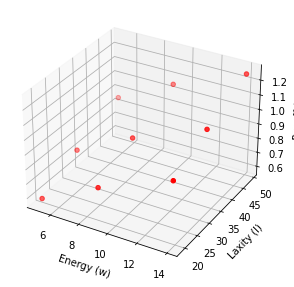

In [54]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
xs = []
ys = []
zs = []
for i in range(len(L)):
    for j in range(len(W)):
        xs.append(L[i])
        ys.append(W[j])
        zs.append(G[i,j])
ax1.scatter(xs, ys, G.T, c='r', marker='o')
ax1.set_xlabel("Energy (w)")
ax1.set_ylabel("Laxity (l)")
ax1.set_zlabel("Payoff (g)")
fig1.tight_layout()


/tmp/ipykernel_105380/2503316661.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')
/tmp/ipykernel_105380/2503316661.py:25: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist=12


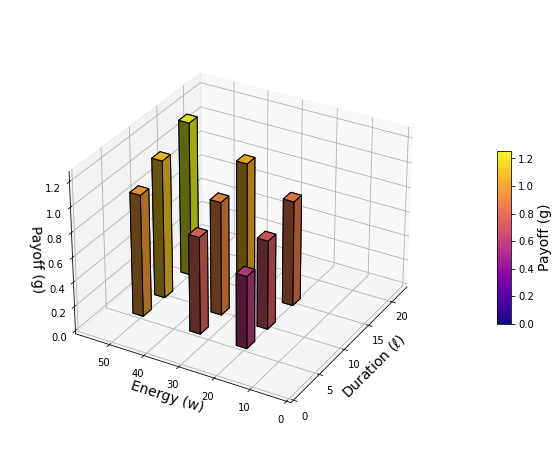

In [55]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(1,1,1, projection='3d')
bottom = np.zeros_like(zs)
lightsource = LightSource(azdeg=95, altdeg=45, hsv_min_val=0, hsv_max_val=1, hsv_min_sat=1, hsv_max_sat=0)
fontsize = 14

cmap = cm.get_cmap('plasma')
norm = plt_colors.Normalize(G.min()*0., G.max())
color = cmap(norm(zs))
ax1.bar3d(xs, ys, bottom, 1.5, 3, zs, lightsource=lightsource, shade=True, color =color, edgecolor="k", alpha=1) 
ax1.view_init(30, 210, 0)

ax1.set_xlabel(r"Duration ($\ell$)", fontsize = fontsize)
ax1.set_ylabel("Energy (w)", fontsize = fontsize)
ax1.set_zlabel("Payoff (g)", fontsize = fontsize)
ax1.set_xlim(0, 19*1.2)
ax1.set_ylim(0, 49*1.2)


sc = cm.ScalarMappable(cmap=cmap, norm=norm)
#sc.set_array([])
cbar = plt.colorbar(sc, ax = ax1,  use_gridspec=True, shrink=0.3, aspect=12, label="Payoff (g)")
cbar.ax.set_ylabel("Payoff (g)", fontsize = fontsize)

ax1.dist=12
fig1.tight_layout(pad = 0, w_pad =1, h_pad = 1)

/tmp/ipykernel_105380/2289863998.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rocket')


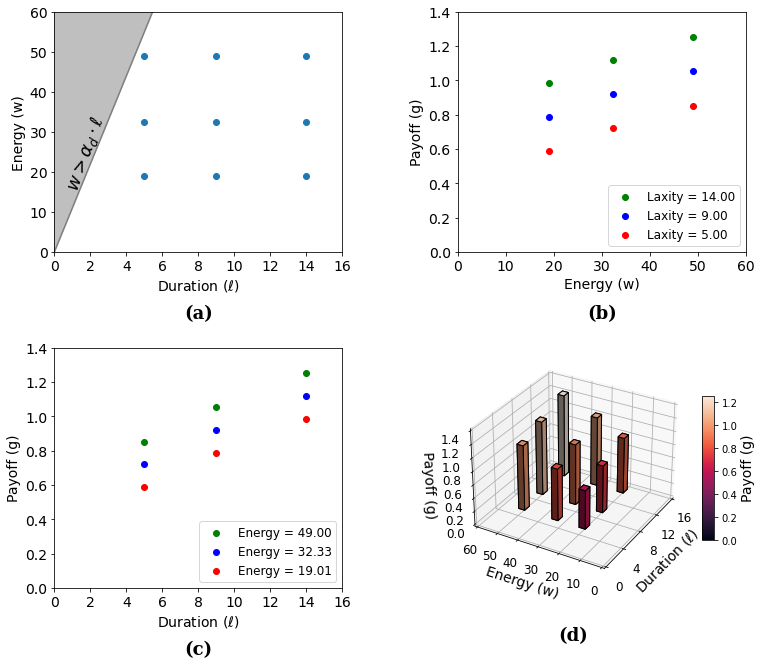

In [71]:
fig1 = plt.figure(figsize = (12,10))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4, projection='3d')
colors = ['r', 'b', 'g', 'y', 'k']
fontsize = 14
max_g = np.max(G)
max_w = np.max(W)
max_l = np.max(L)  

xs = []
ys = []
zs = []
for i in range(len(L)):
    for j in range(len(W)):
        xs.append(L[i])
        ys.append(W[j])
        zs.append(G[i,j])

l_hat = np.arange(0, max_l*1.1, 0.1)
#w_hat = l_hat * psi * alpha_d
w_hat = l_hat * alpha_d
w_max = np.max(w_hat)*np.ones(len(w_hat))

# Save infeasible points to list
w_infeas_idx = []
l_infeas_idx = []

for i, w in enumerate(W):
    for j, l in enumerate(L):
        if w > l * psi * alpha_d:
            w_infeas_idx.append(i)
            l_infeas_idx.append(j)

ax1.plot(l_hat, w_hat, color='grey')
ax1.fill_between(l_hat, w_hat, w_max, color='grey', alpha=0.5) #, label="Infeasible region")
ax1.scatter(xs, ys)
ax1.set_xlim(0, max_l*1.1)
ax1.set_ylim(0, max_w*1.1)
ax1.set_xlabel(r"Duration ($\ell$)", fontsize = fontsize)
ax1.set_ylabel("Energy (w)", fontsize = fontsize)
xticks = ax1.get_xticks()
ax1.set_xticks(xticks)
ax1.set_xticklabels([f"{x:.0f}" for x in xticks], fontsize = fontsize)
yticks =ax1.get_yticks() 
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{y:.0f}" for y in yticks], fontsize = fontsize)
ax1.set_title("(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

ax1.text(0.5, 16, r"$w > \alpha_d \cdot \ell$", fontsize=fontsize+4, rotation=70)
#ax1.legend(loc = "lower right", fontsize = fontsize)
ax1.set_title("(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

for j in range(len(L)):
    gp = G[:,j]
    ax2.scatter(W, gp, color = colors[j], label = f"Laxity = {L[j]:.2f}")
    ax2.plot(W, gp, color = colors[j], ls = ":")
#ax2.scatter(W[w_infeas_idx], G[w_infeas_idx, l_infeas_idx], color = 'grey', marker='x', s=100, label = "Infeasible")
ax2.set_xlim(0, max_w*1.1)
ax2.set_ylim(0, max_g*1.1)
xticks = ax2.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels([f"{x:.0f}" for x in xticks], fontsize = fontsize)
yticks = ax2.get_yticks()
ax2.set_yticks(yticks)
ax2.set_yticklabels([f"{y:.1f}" for y in yticks], fontsize = fontsize)

ax2.set_xlabel("Energy (w)", fontsize = fontsize)
ax2.set_ylabel("Payoff (g)", fontsize = fontsize)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], loc="lower right", fontsize = fontsize-2)
ax2.set_title("(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

for i in range(len(W)):
    gp = G[i,:]
    ax3.scatter(L, gp, color = colors[i], label = f"Energy = {W[i]:.2f}")
#ax3.scatter(L[l_infeas_idx], G[w_infeas_idx, l_infeas_idx], color = 'grey', marker='x', s=100, label = "Infeasible")
ax3.set_xlim(0, max_l*1.1)
ax3.set_ylim(0, max_g*1.1)
xticks = ax3.get_xticks()
ax3.set_xticks(xticks)
ax3.set_xticklabels([f"{x:.0f}" for x in xticks], fontsize = fontsize)
yticks = ax3.get_yticks()
ax3.set_yticks(yticks)
ax3.set_yticklabels([f"{y:.1f}" for y in yticks], fontsize = fontsize)
ax3.set_xlabel(r"Duration ($\ell$)", fontsize = fontsize)
ax3.set_ylabel("Payoff (g)", fontsize = fontsize)
ax3.set_title("(c)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], loc="lower right", fontsize = fontsize-2)


bottom = np.zeros_like(zs)
lightsource = LightSource(azdeg=95, altdeg=45, hsv_min_val=0, hsv_max_val=1, hsv_min_sat=1, hsv_max_sat=0)

cmap = cm.get_cmap('rocket')
norm = plt_colors.Normalize(G.min()*0., G.max())
color = cmap(norm(zs))

ax4.bar3d(xs, ys, bottom, 1, 3, zs, lightsource=lightsource, shade=True, color =color, edgecolor="k", alpha=1) 
ax4.view_init(30, 210, 0)
ax4.set_xlabel(r"Duration ($\ell$)", fontsize = fontsize)
ax4.set_ylabel("Energy (w)", fontsize = fontsize)
ax4.set_zlabel("Payoff (g)", fontsize = fontsize)
ax4.set_xlim(0, max_l*1.1)
ax4.set_ylim(0, max_w*1.1)
xticks = ax4.get_xticks()
xticks = xticks[xticks % 4 == 0]
ax4.set_xticks(xticks)
ax4.set_xticklabels([f"{x:.0f}" for x in xticks], fontsize = fontsize-2)
yticks = ax4.get_yticks()
ax4.set_yticks(yticks)
ax4.set_yticklabels([f"{y:.0f}" for y in yticks], fontsize = fontsize-2)
zticks = ax4.get_zticks()
ax4.set_zticks(zticks)
ax4.set_zticklabels([f"{z:.1f}" for z in zticks], fontsize = fontsize-2)

sc = cm.ScalarMappable(cmap=cmap, norm=norm)
#sc.set_array([])
cbar = plt.colorbar(sc, ax = ax4,  use_gridspec=True, shrink=0.6, aspect=12)
cbar.ax.tick_params(labelsize=fontsize-4)
cbar.ax.set_ylabel("Payoff (g)", fontsize = fontsize)
# Set the colorbar ax label size
ax4.set_title("(d)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

#fig1.tight_layout(pad = 4, h_pad = 2, w_pad = 2)
fig1.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig1.savefig("../figs/timevar_contracts.pdf", dpi = 600, bbox_inches='tight')

19.0050303186739
32.32959289956383
49.001174511487775


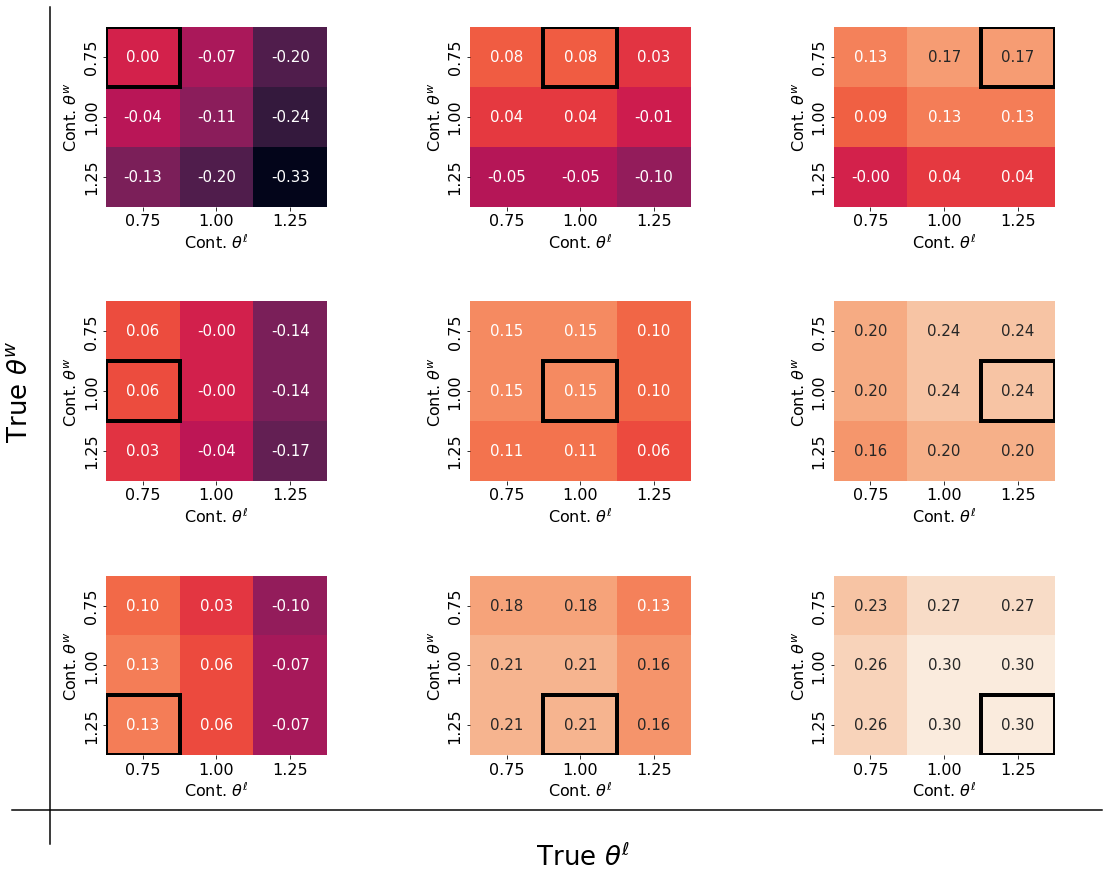

In [69]:

#G, W, L = general_contracts(IR = "fst", IC = "ort_l", monotonicity=False)
ev_utility = np.zeros((len(W), len(L), len(W), len(L)))
types_i = [0.75, 1, 1.25]
types_j = [0.75, 1, 1.25]
c1 = 0.01
c2 = 0.05

for i, true_i in enumerate(types_i):
    print(W[i])
    for j, true_j in enumerate(types_j):
        for ip in range(len(types_i)):
            for jp in range(len(types_j)):
                ev_utility[i,j,ip,jp] = G[ip, jp] - c1 * W[ip] / true_i - c2 * L[jp] / true_j

vmin = np.min(ev_utility)
vmax = np.max(ev_utility)
fig1 = plt.figure(figsize = (15,12))
axs = fig1.subplots(len(W), len(L),)
fontsize = 16

for i, true_i in enumerate(types_i):
    for j, true_j in enumerate(types_j):
        sns.heatmap(ev_utility[i,j,:,:], ax = axs[i,j], vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt=".2f", cmap="rocket", annot_kws={"fontsize":fontsize-1})
        axs[i,j].add_patch(Rectangle((j,i),1,1, fill=False, edgecolor="black", lw=4))
        axs[i,j].set_xlabel(r"Cont. $\theta^\ell$", fontsize = fontsize)
        axs[i,j].set_ylabel(r"Cont. $\theta^w$", fontsize = fontsize)
        xticks = axs[i,j].get_xticks()
        axs[i,j].set_xticks(xticks)
        axs[i,j].set_xticklabels([f"{x:.2f}" for x in types_j], fontsize = fontsize)
        yticks = axs[i,j].get_yticks()
        axs[i,j].set_yticks(yticks)
        axs[i,j].set_yticklabels([f"{y:.2f}" for y in types_i], fontsize = fontsize)

fig1.supxlabel("\n"+ r"              True $\theta^\ell$", fontsize = fontsize + 10)
fig1.supylabel(r"              True $\theta^w$"+"\n", fontsize = fontsize + 10)
fig1.tight_layout()

transFigureX = fig1.transFigure.inverted()
coord1 = transFigureX.transform(axs[2,0].transData.transform([-1,3.8]))
coord2 = transFigureX.transform(axs[2,2].transData.transform([3.5,3.8]))
lineX = plt_lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]), transform = fig1.transFigure, color="black",)
fig1.lines.append(lineX)

transFigureY = fig1.transFigure.inverted()
coord1 = transFigureY.transform(axs[0,0].transData.transform([-0.6,-0.3]))
coord2 = transFigureY.transform(axs[2,0].transData.transform([-0.6,4.3]))
lineY = plt_lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]), transform = fig1.transFigure, color="black",)
fig1.lines.append(lineY)
#fig1.tight_layout(h_pad=1, w_pad=1 )
fig1.tight_layout(w_pad=10, h_pad=5)


fig1.savefig("../figs/ev_utility.pdf", dpi = 600, bbox_inches='tight')


## Time comparison

In [11]:
import time
time_compare = False # Perform the experiment

In [12]:
time_nontract = []
time_tract = []
err_G = []
err_W = []
err_L = []
list_n = []
num_trials = 5
if time_compare:
    for n in tqdm(range(2,10)):
        for trial in range(num_trials):
            types_i = np.linspace(0.5, 2, n, endpoint=True)
            types_j = np.linspace(0.5, 2, n, endpoint=True)
            nontract_s = time.time()
            G_a, W_a, L_a = general_contracts(thetas_i = types_i, thetas_j = types_j, monotonicity=True)
            nontract_e = time.time()

            tract_s = time.time()
            G_x, W_x, L_x = general_contracts(thetas_i = types_i, thetas_j = types_j, IR = "fst", IC = "ort_l", monotonicity=False)
            tract_e = time.time()

            time_nontract.append(nontract_e - nontract_s)
            time_tract.append(tract_e - tract_s)
            err_G.append(np.mean(np.abs(G_a - G_x)))
            err_W.append(np.mean(np.abs(W_a - W_x)))
            err_L.append(np.mean(np.abs(L_a - L_x)))
            list_n.append(n)

In [13]:
if time_compare:
    df_timetrial = pd.DataFrame(data  = np.array([list_n, time_nontract, time_tract, err_G, err_W, err_L]).T,
                                columns = ["n", "time_nontract", "time_tract", "err_G", "err_W", "err_L"])
    df_timetrial.to_csv("./data/timetrial.csv", index=False)
else:
    df_timetrial = pd.read_csv("./data/timetrial.csv")
df_timetrial.describe()

,n,time_nontract,time_tract,err_G,err_W,err_L
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.500000,8.714317,0.460366,0.000014,0.001035,0.000200
std,2.320477,9.588571,0.294902,0.000014,0.000983,0.000253
min,2.000000,0.096814,0.052798,0.000001,0.000115,0.000011
25%,3.750000,0.963941,0.164470,0.000005,0.000493,0.000063
50%,5.500000,4.912089,0.436916,0.000009,0.000695,0.000113
75%,7.250000,13.498118,0.696365,0.000016,0.001122,0.000191
max,9.000000,28.831125,1.004117,0.000046,0.003253,0.000840


In [14]:
gdf_timetrial = df_timetrial.groupby("n").agg(nontract_avg = ("time_nontract", np.mean),
                                              nontract_std = ("time_nontract", np.std),
                                              tract_avg = ("time_tract", np.mean),
                                              tract_std = ("time_tract", np.std),
                                              err_G_avg = ("err_G", np.mean),
                                              err_G_std = ("err_G", np.std),
                                              err_W_avg = ("err_W", np.mean),
                                              err_W_std = ("err_W", np.std),
                                              err_L_avg = ("err_L", np.mean),
                                              err_L_std = ("err_L", np.std)
                                              ).reset_index()
gdf_timetrial["num"] = gdf_timetrial["n"]**2

In [15]:
gdf_timetrial.head(20)

,n,nontract_avg,nontract_std,tract_avg,tract_std,err_G_avg,err_G_std,err_W_avg,err_W_std,err_L_avg,err_L_std,num
0,2.0,0.122704,0.033981,0.060549,0.009867,0.000046,0.0,0.001840,0.0,0.000840,0.0,4.0
1,3.0,0.468612,0.033096,0.117415,0.008296,0.000024,0.0,0.003253,0.0,0.000183,0.0,9.0
2,4.0,1.350449,0.181893,0.253593,0.080277,0.000001,0.0,0.000115,0.0,0.000011,0.0,16.0
3,5.0,3.228887,0.288755,0.419653,0.043756,0.000009,0.0,0.000674,0.0,0.000089,0.0,25.0
4,6.0,6.613956,0.321904,0.540427,0.122135,0.000004,0.0,0.000218,0.0,0.000064,0.0,36.0
5,7.0,11.255694,0.606976,0.621604,0.056182,0.000014,0.0,0.000717,0.0,0.000217,0.0,49.0
6,8.0,18.251605,0.548687,0.735568,0.030209,0.000006,0.0,0.000882,0.0,0.000059,0.0,64.0
7,9.0,28.422631,0.255849,0.934122,0.048257,0.000010,0.0,0.000584,0.0,0.000136,0.0,81.0


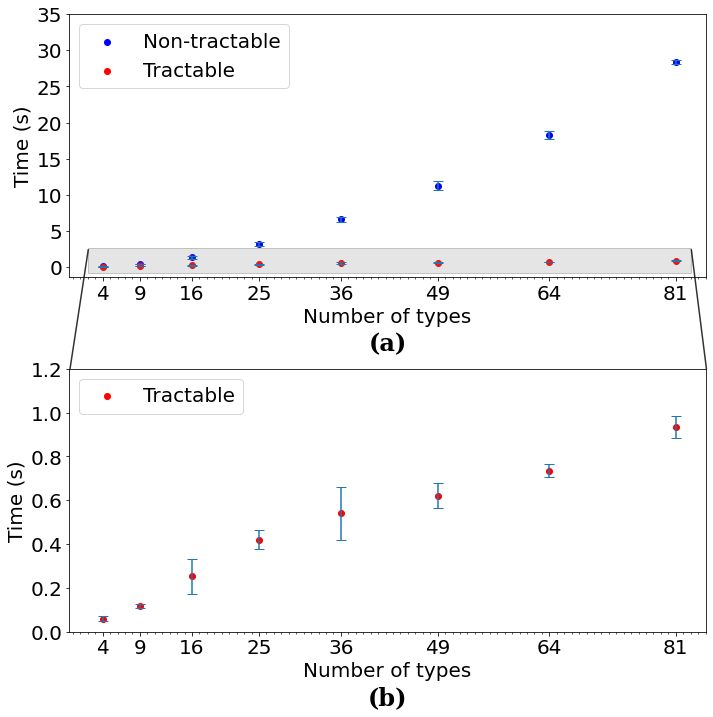

In [16]:
fig1 = plt.figure(figsize = (10,10))
fontsize = 20

ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)

ax1.scatter(gdf_timetrial["num"], gdf_timetrial["nontract_avg"], label = "Non-tractable", color="blue")
ax1.scatter(gdf_timetrial["num"], gdf_timetrial["tract_avg"], label = "Tractable", color="red")

ax1.errorbar(gdf_timetrial["num"], gdf_timetrial["nontract_avg"], yerr = gdf_timetrial["nontract_std"], fmt = "none", capsize = 5)
ax1.errorbar(gdf_timetrial["num"], gdf_timetrial["tract_avg"],    yerr = gdf_timetrial["tract_std"],    fmt = "none", capsize = 5)

ax1.set_xticks(gdf_timetrial["num"])
ax1.set_xticklabels([f"{x:.0f}" for x in gdf_timetrial["num"]], fontsize = fontsize)

ax1.set_xlim([-0.5,85])
y_ticks = ax1.get_yticks()[1:]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:.0f}" for y in y_ticks], fontsize = fontsize)

ax1.set_ylabel("Time (s)", fontsize = fontsize)
ax1.set_xlabel(r"Number of types", fontsize = fontsize)

ax1.legend(fontsize = fontsize, loc="upper left")
ax1.set_title("(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

ax1.add_patch(Rectangle((2,-0.8),81,3.5, fill=True, alpha=0.2, facecolor="grey", edgecolor="black"))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))


ax2.scatter(gdf_timetrial["num"], gdf_timetrial["tract_avg"], label = "Tractable", color="red")
ax2.errorbar(gdf_timetrial["num"], gdf_timetrial["tract_avg"],    yerr = gdf_timetrial["tract_std"],  fmt = "none", capsize = 5)
ax2.set_xticks(gdf_timetrial["num"])
ax2.set_xticklabels([f"{x:.0f}" for x in gdf_timetrial["num"]], fontsize = fontsize)
y_ticks = ax2.get_yticks()#[1:]
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y:.1f}" for y in y_ticks], fontsize = fontsize)
ax2.set_ylabel("Time (s)", fontsize = fontsize)
ax2.set_xlabel(r"Number of types", fontsize = fontsize)
ax2.legend(fontsize = fontsize, loc="upper left")

ax2.set_xlim([-0.5,85])
ax2.set_title("(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)



transFigureX = fig1.transFigure.inverted()
coord1 = transFigureX.transform(ax1.transData.transform([-0.22,10.3]))
coord2 = transFigureX.transform(ax2.transData.transform([-3,1.25]))
lineX = plt_lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]), transform = fig1.transFigure, color="black", alpha=0.8)
fig1.lines.append(lineX)

transFigureY = fig1.transFigure.inverted()
coord1 = transFigureY.transform(ax1.transData.transform([92.2,10.3]))
coord2 = transFigureY.transform(ax2.transData.transform([94.5,1.25]))
lineY = plt_lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]), transform = fig1.transFigure, color="black", alpha=0.8, )
fig1.lines.append(lineY)
fig1.tight_layout()
fig1.savefig("./../figs/contracts_timetrial.pdf", dpi = 600, bbox_inches = "tight")